In [1]:
#importing modules for scrapping, analyzing and vizualisation of data

import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime
from __future__ import division

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [2]:
#analyzing the security price movements of two companies, Corning, Inc. (GLW US) and GrubHub, Inc. (GRUB US) from 1/1/2015 to 6/30/2015.  

tech_list = ['GLW','GRUB']

start = datetime(2015,1,1)
end = datetime(2015,6,30)

In [3]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GRUB: Data doesn't exist for startDate = 1420066800, endDate = 1435615200


After scrapping data, there is no stock information before 2020 for GrubHub, Inc. (GRUB US)!

In [4]:
GLW.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,23.299999,23.440001,22.910000,22.930000,19.212643,6251600
2015-01-02,23.030001,23.110001,22.750000,23.010000,19.279667,5009300
2015-01-05,22.840000,22.950001,22.570000,22.690001,19.011549,7039700
2015-01-06,21.889999,22.770000,21.889999,22.299999,18.684769,7835600
2015-01-07,22.480000,22.770000,22.350000,22.620001,18.952898,5839900


1. Calculate and report the min, max, and average closing price for each security over the period.

In [5]:
#simple comand describe to generate descriptive statistics.

GLW.describe()

,Open,High,Low,Close,Adj Close,Volume
count,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02
mean,22.623952,22.824032,22.373952,22.595726,19.014889,8.924693e+06
std,1.361690,1.404034,1.354200,1.391862,1.119721,2.854714e+06
min,20.219999,20.240000,19.660000,19.700001,16.680981,4.808100e+06
25%,21.237500,21.422500,20.995000,21.217499,17.916947,6.917375e+06
50%,22.595000,22.835000,22.380000,22.630000,19.024127,8.294200e+06
75%,23.682500,23.900000,23.362501,23.760000,19.940628,9.957125e+06
max,24.959999,25.160000,24.760000,25.000000,20.947058,2.263510e+07


In [6]:
#Python use 'mean' to show average value. I did change of name in order to show on table requested results. 

MMM = GLW.describe()
MMM = MMM.rename(index = {'mean':'average'})
MMM.loc[['min', 'max', 'average']]

,Open,High,Low,Close,Adj Close,Volume
min,20.219999,20.240000,19.660000,19.700001,16.680981,4.808100e+06
max,24.959999,25.160000,24.760000,25.000000,20.947058,2.263510e+07
average,22.623952,22.824032,22.373952,22.595726,19.014889,8.924693e+06


2. Identify and report the most significant positive spike in the price. 
    Please provide a possible explanation for the spike.

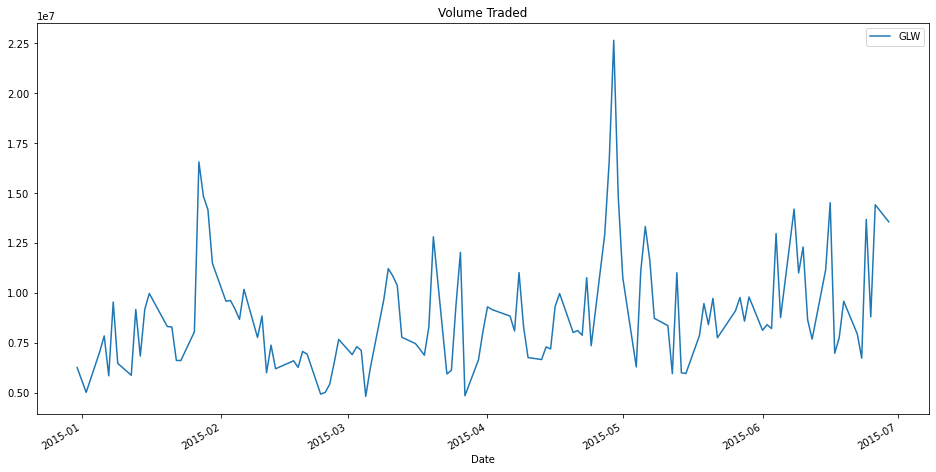

In [7]:
#plotting data using Volume of Trades
GLW['Volume'].plot(label= 'GLW', figsize = (16,8), title = 'Volume Traded')
plt.legend()

In [8]:
GLW.iloc[[GLW['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-29,21.77,21.780001,20.870001,21.360001,17.984257,22635100


Possible explaination of spike:
Corning Declares Quarterly Dividend
CORNING, N.Y., April 29, 2015 - The Board of Directors of Corning Incorporated (NYSE: GLW) today declared a quarterly dividend on the company's common stock of $0.12 per share, payable on June 30, 2015, to holders of record on May 29, 2015.

[source] https://www.marketscreener.com/quote/stock/CORNING-INCORPORATED-12788/news/Corning-2015-04-29-Corning-Declares-Quarterly-Dividend-20282496/

3. Calculate the return on investment for 1,000 shares from 1/1/2015 to the date of any one significant price spike. You may choose either security for this exercise.

Formula for calculation:

ROI= ((FVI−IVI)/Cost of Investment)*100%

Where:

ROI=Return on Investment
FVI=Final value of investment
IVI=Initial value of investment

I decided to calculate data until fist spike visible on Volume plot shown earlier happend at 28th January 2015 with Open Security price of 24.87$

In [9]:
#finding exact day of pick (highest price on Open Security) in February. 

GLW[15:22]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-23,23.690001,23.930000,23.629999,23.850000,19.983488,6603100
2015-01-26,23.750000,24.120001,23.540001,23.910000,20.033760,8039600
2015-01-27,23.709999,24.980000,23.700001,24.730000,20.720825,16548000
2015-01-28,24.870001,25.160000,24.170000,24.219999,20.293505,14824600
2015-01-29,24.360001,24.360001,23.270000,23.790001,19.933216,14157400
2015-01-30,23.650000,24.150000,23.610001,23.770000,19.916456,11472400
2015-02-02,23.870001,24.190001,23.230000,24.150000,20.234852,9573700


In [10]:
#showing start and end price.

Investment = GLW.loc[['2015-01-02','2015-01-28']]
InvestmentData = pd.DataFrame (Investment, columns=['Open'])
InvestmentData

,Open
Date,
2015-01-02,23.030001
2015-01-28,24.870001


In [11]:
Percentage_Return_of_Investment=((InvestmentData.loc['2015-01-28']-InvestmentData.loc['2015-01-02'])/InvestmentData.loc['2015-01-02'])*100
Percentage_Return_of_Investment

Open    7.989579
dtype: float64

ROI = 7.99% 

In [12]:
Return_of_Investment=((InvestmentData.loc['2015-01-28']-InvestmentData.loc['2015-01-02'])*1000)
Return_of_Investment

Open    1840.000153
dtype: float64

Return on investment for 1000 shares in this period fo time is 1840$ which means profit for this transaction is 840$

4. Please create a data visualization using a medium of your choice to show the price moves and highlight any abnormal price moves.

Below is shown graphic showing Open Price Moving Average for 5, 10 & 20 Days in order to follow trands of the data. 

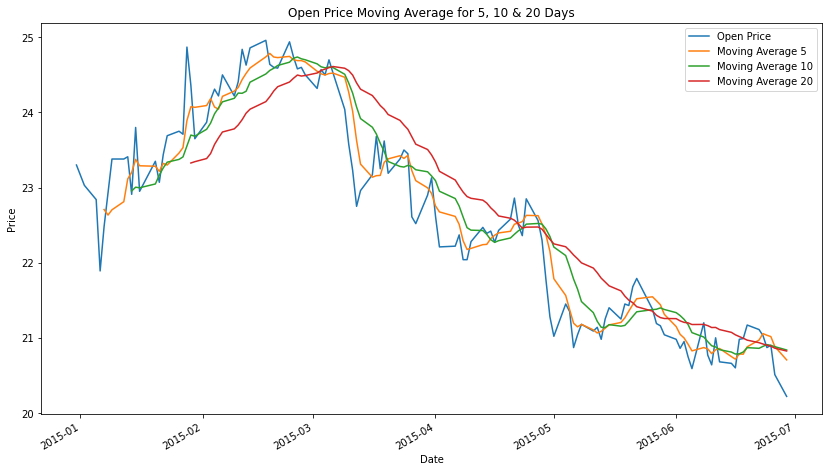

In [13]:
GLW['Open'].plot(label = 'Open Price',figsize=(14,8))
MA=GLW['Open'].rolling(5).mean()
MA.plot(label = 'Moving Average 5')
MA10=GLW['Open'].rolling(10).mean()
MA10.plot(label = 'Moving Average 10')
MA20=GLW['Open'].rolling(20).mean()
MA20.plot(label = 'Moving Average 20')
plt.legend()
plt.title('Open Price Moving Average for 5, 10 & 20 Days')
plt.ylabel('Price')
plt.show()

We notice abnormal price move at the end of January. Possible explanation for this is announcmend that Corning Incorporated Acquires Assets of NovaSol. 
[source: https://sensorsandsystems.com/corning-incorporated-acquires-assets-of-novasol/]